In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

%matplotlib ipympl

In [2]:
@dataclass
class Line:
    origin: np.ndarray
    direction: np.ndarray


def find_points(line_a: Line, line_b: Line):
    n = np.cross(line_a.direction, line_b.direction)
    d = np.abs(np.dot(n, line_a.origin - line_b.origin)) / np.linalg.norm(n)
    
    t_a = np.dot(np.cross(line_b.direction, n), (line_b.origin - line_a.origin)) / np.dot(n, n)
    t_b = np.dot(np.cross(line_a.direction, n), (line_b.origin - line_a.origin)) / np.dot(n, n)

    p_a = line_a.origin + t_a * line_a.direction
    p_b = line_b.origin + t_b * line_b.direction

    return p_a, p_b


line_1 = Line(np.array([2, 6, -9]), np.array([3, 4, -4]))
line_2 = Line(np.array([-1, -2, 3]), np.array([2, -6, 1]))

p_1, p_2 = find_points(line_1, line_2)
middle_point = (p_1+p_2) / 2
print(middle_point)

[-2.7978279  -1.47034252  1.00501253]


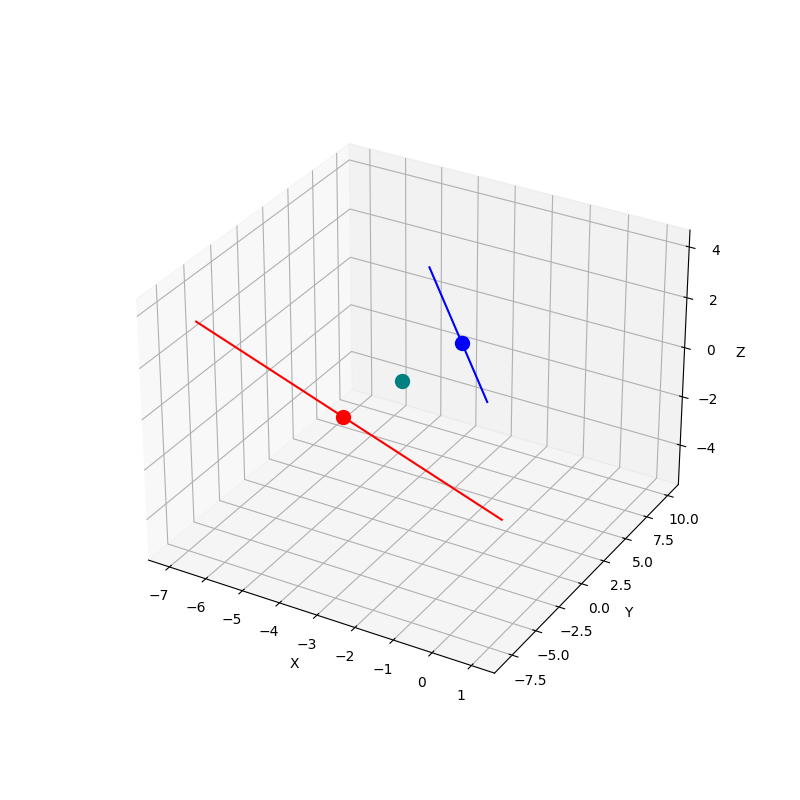

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


t = np.linspace(-3, -1, 200)
ax.plot3D(
    line_1.origin[0] + t*line_1.direction[0],
    line_1.origin[1] + t*line_1.direction[1],
    line_1.origin[2] + t*line_1.direction[2],
    'red'
)
t = np.linspace(-2, 1, 300)
ax.plot3D(
    line_2.origin[0] + t*line_2.direction[0],
    line_2.origin[1] + t*line_2.direction[1],
    line_2.origin[2] + t*line_2.direction[2],
    'blue'
)

ax.scatter(*p_1, color='red', s=100)
ax.scatter(*p_2, color='blue', s=100)
ax.scatter(*middle_point, color='teal', s=100)

# ax.quiver(*camera.position, *v, color='red')
# plt.axis('off')
plt.show()

In [4]:
pixel = np.array([256, 256])
resolution = np.array([3840, 2160])

ndc_pixel = (pixel + 0.5) / resolution

img_aspect_ratio = resolution[0] / resolution[1]



screen_pixel = (2*ndc_pixel - 1) * img_aspect_ratio
screen_pixel[1] = 1 - 2*ndc_pixel[1]